In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('/home/brandon/IU International University/Project: From Model to Production/opp-stops_state.csv')

# Display the first few rows of the dataframe
data.head()


,state,city,geography,subgeography,subject_race,search_rate,stop_rate,hit_rate,inferred_threshold,stops_per_year,stop_rate_n
0,AZ,Statewide,AZ,Apache County,white,NaN,0.077444,NaN,NaN,7064.888889,293234.024096
1,AZ,Statewide,AZ,Apache County,black,NaN,0.115928,NaN,NaN,385.246753,32012.963855
2,AZ,Statewide,AZ,Apache County,hispanic,NaN,0.065497,NaN,NaN,1280.962025,137774.746988
3,AZ,Statewide,AZ,Cochise County,white,NaN,0.077444,NaN,NaN,12371.855422,293234.024096
4,AZ,Statewide,AZ,Cochise County,black,NaN,0.115928,NaN,NaN,1568.810127,32012.963855


In [2]:
# Summary of the data
summary = data.describe(include='all').transpose()
summary['missing_values'] = data.isnull().sum()
summary


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,missing_values
state,4053,21,TX,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
city,4053,1,Statewide,4053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
geography,4053,21,TX,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
subgeography,4020,1062,Jefferson County,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
subject_race,4053,3,white,1375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
search_rate,675.0,NaN,NaN,NaN,0.03127,0.021502,0.002411,0.016024,0.025916,0.040757,0.150114,3378
stop_rate,4053.0,NaN,NaN,NaN,0.069004,0.047903,0.007299,0.039236,0.06723,0.08831,0.31348,0
hit_rate,675.0,NaN,NaN,NaN,0.310281,0.150544,0.015385,0.183541,0.317483,0.425996,0.753425,3378
inferred_threshold,675.0,NaN,NaN,NaN,0.191286,0.094123,0.012817,0.109296,0.181012,0.265127,0.504235,3378
stops_per_year,4053.0,NaN,NaN,NaN,3329.237834,10657.008891,12.0,103.726027,652.5,2837.454545,365210.909091,0


In [3]:
# Descriptive statistics for numerical columns
data[['search_rate', 'stop_rate', 'hit_rate', 'inferred_threshold', 'stops_per_year', 'stop_rate_n']].describe()


,search_rate,stop_rate,hit_rate,inferred_threshold,stops_per_year,stop_rate_n
count,675.000000,4053.000000,675.000000,675.000000,4053.000000,4.053000e+03
mean,0.031270,0.069004,0.310281,0.191286,3329.237834,2.993479e+05
std,0.021502,0.047903,0.150544,0.094123,10657.008891,3.927000e+05
min,0.002411,0.007299,0.015385,0.012817,12.000000,4.864000e+02
25%,0.016024,0.039236,0.183541,0.109296,103.726027,4.021800e+04
50%,0.025916,0.067230,0.317483,0.181012,652.500000,1.344720e+05
75%,0.040757,0.088310,0.425996,0.265127,2837.454545,4.612054e+05
max,0.150114,0.313480,0.753425,0.504235,365210.909091,1.917549e+06


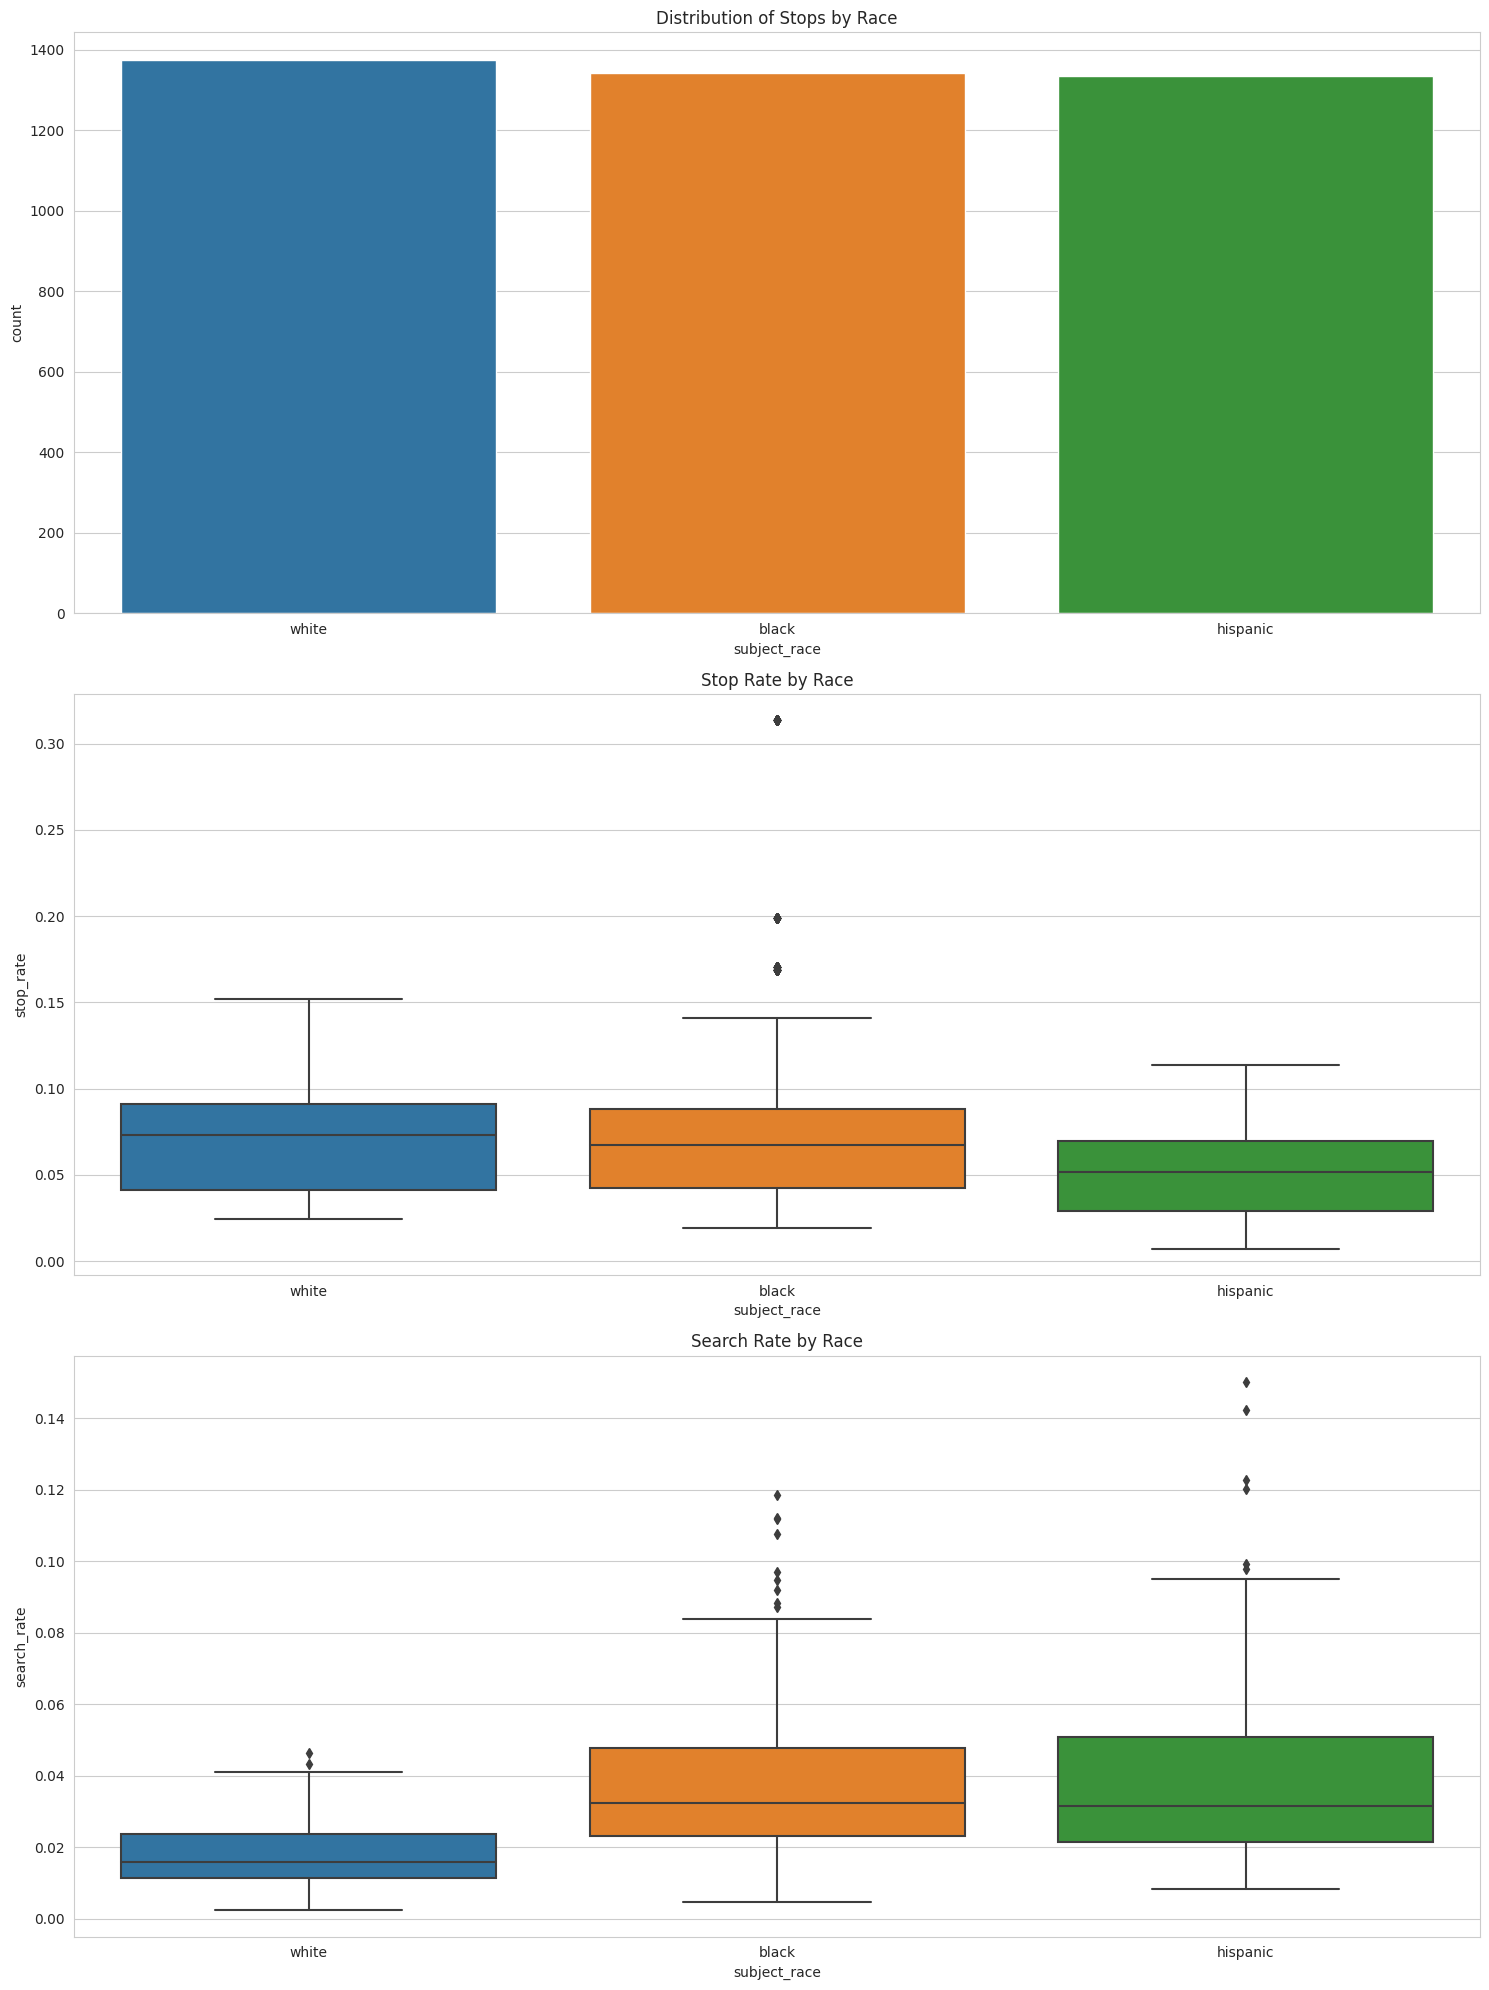

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

# Distribution of stops by race
sns.countplot(ax=axes[0], data=data, x='subject_race')
axes[0].set_title('Distribution of Stops by Race')

# Stop rate by race
sns.boxplot(ax=axes[1], data=data, x='subject_race', y='stop_rate')
axes[1].set_title('Stop Rate by Race')

# Search rate by race
sns.boxplot(ax=axes[2], data=data, x='subject_race', y='search_rate')
axes[2].set_title('Search Rate by Race')

plt.tight_layout()
plt.show()


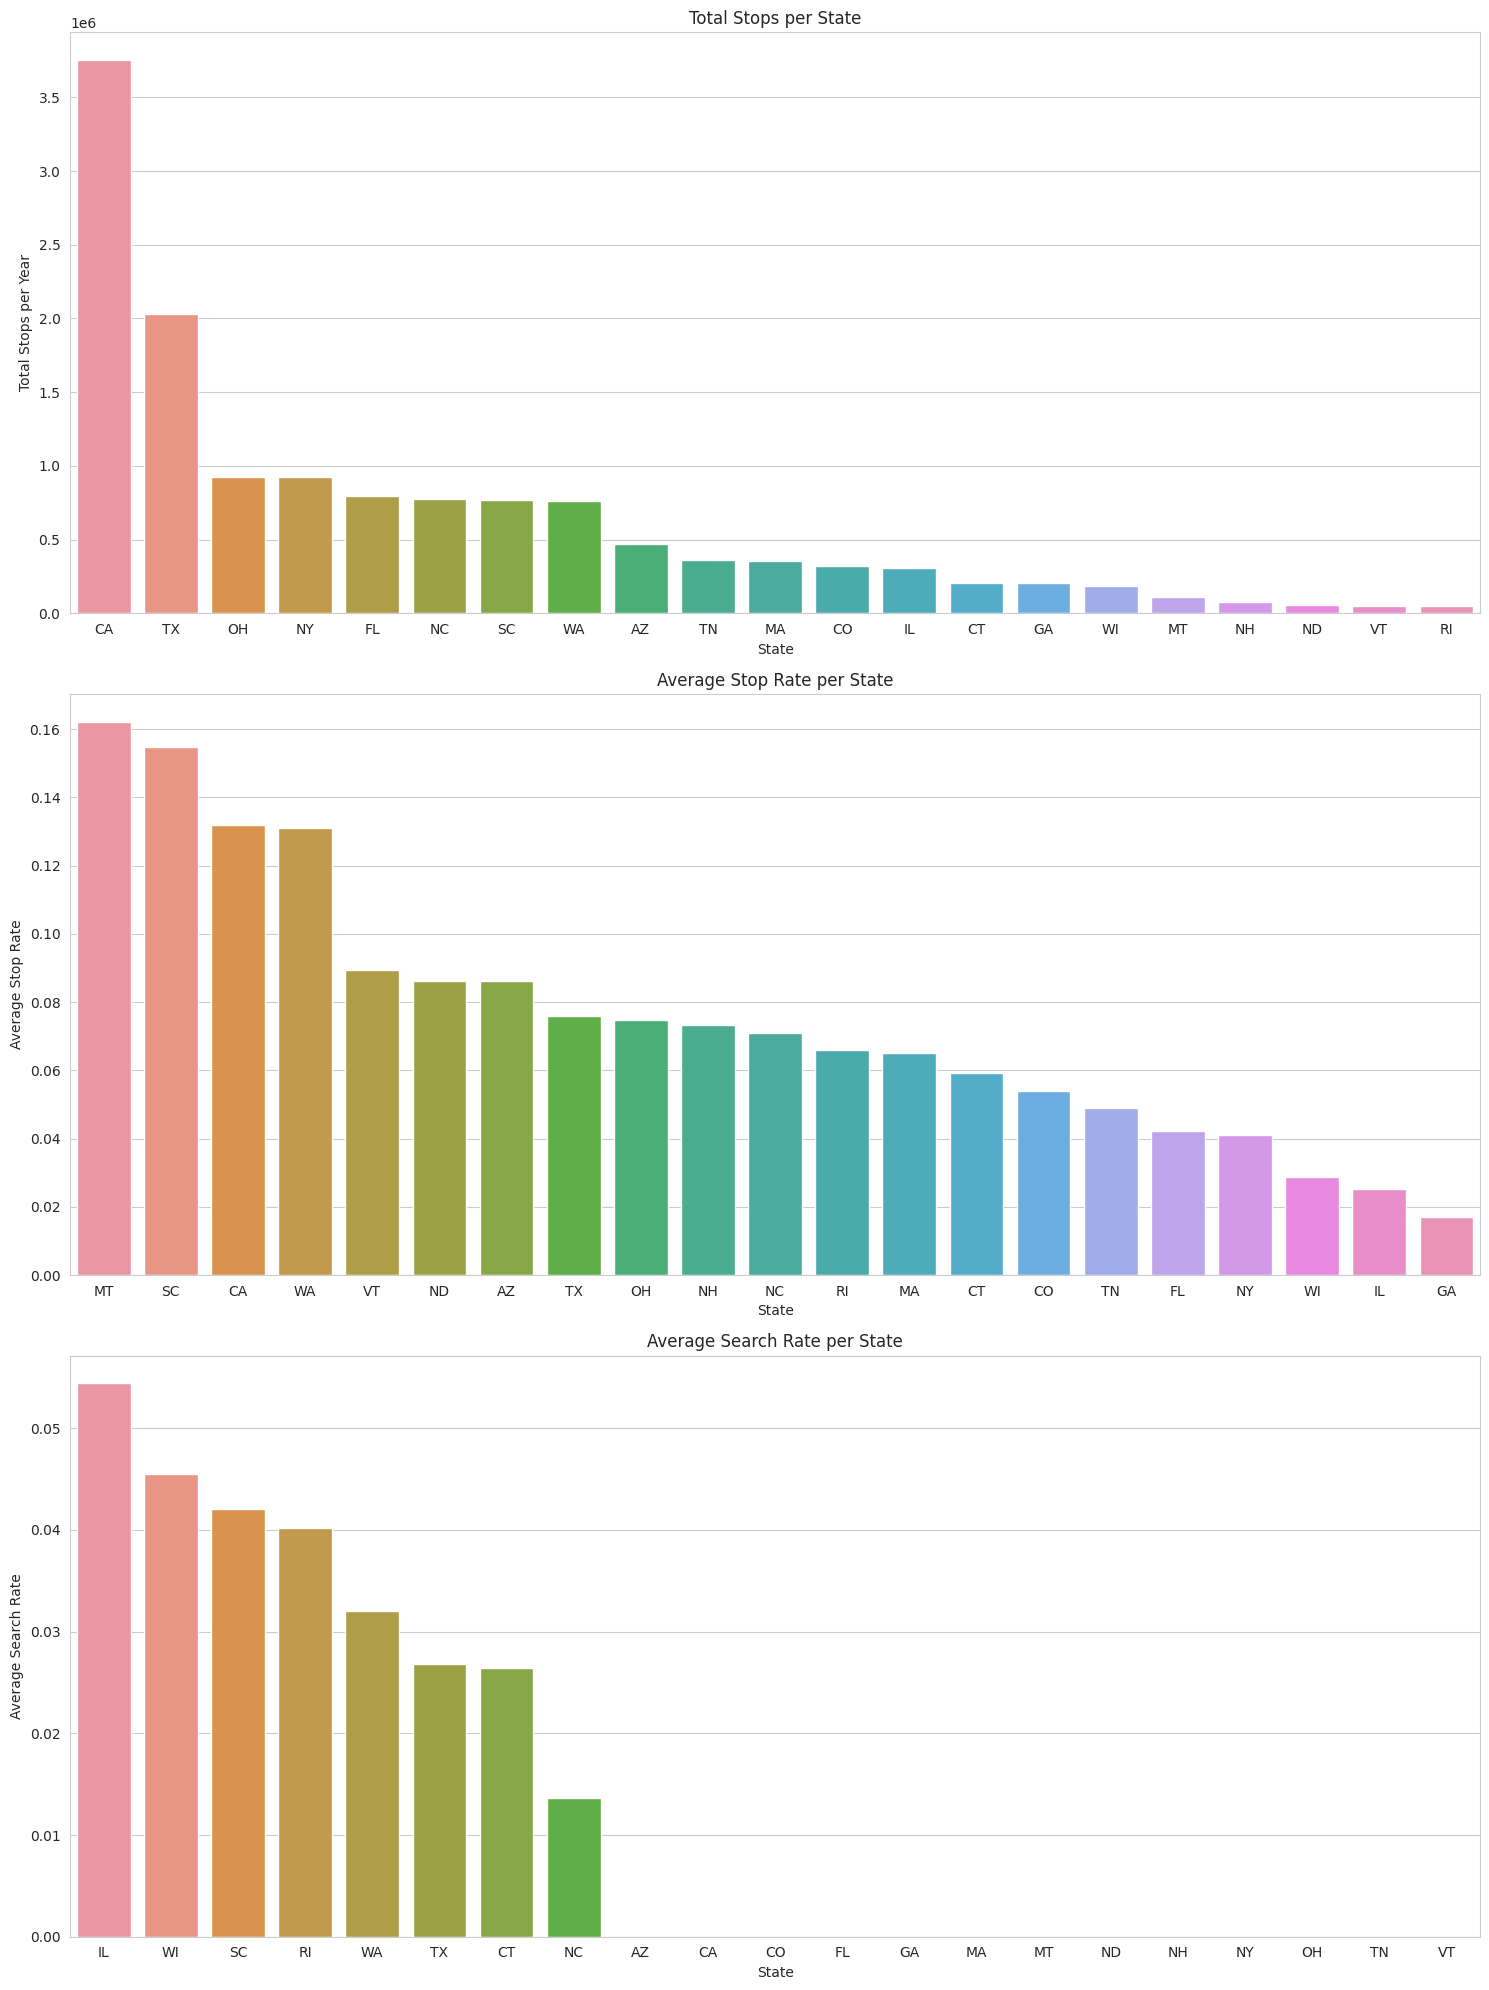

In [5]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

# Total stops per state
total_stops_per_state = data.groupby('state')['stops_per_year'].sum().sort_values(ascending=False)
sns.barplot(ax=axes[0], x=total_stops_per_state.index, y=total_stops_per_state.values)
axes[0].set_title('Total Stops per State')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Total Stops per Year')

# Average stop rate per state
avg_stop_rate_per_state = data.groupby('state')['stop_rate'].mean().sort_values(ascending=False)
sns.barplot(ax=axes[1], x=avg_stop_rate_per_state.index, y=avg_stop_rate_per_state.values)
axes[1].set_title('Average Stop Rate per State')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Average Stop Rate')

# Average search rate per state
avg_search_rate_per_state = data.groupby('state')['search_rate'].mean().sort_values(ascending=False)
sns.barplot(ax=axes[2], x=avg_search_rate_per_state.index, y=avg_search_rate_per_state.values)
axes[2].set_title('Average Search Rate per State')
axes[2].set_xlabel('State')
axes[2].set_ylabel('Average Search Rate')

plt.tight_layout()
plt.show()


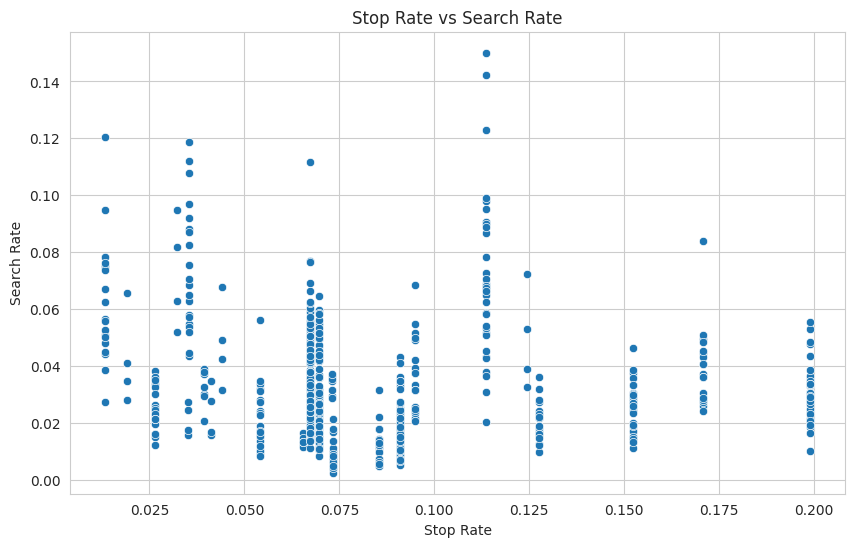

,stop_rate,search_rate
stop_rate,1.000000,-0.103746
search_rate,-0.103746,1.000000


In [6]:
# Scatter plot of stop rate vs search rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='stop_rate', y='search_rate')
plt.title('Stop Rate vs Search Rate')
plt.xlabel('Stop Rate')
plt.ylabel('Search Rate')
plt.show()

# Calculate the Pearson correlation coefficient
data[['stop_rate', 'search_rate']].corr()


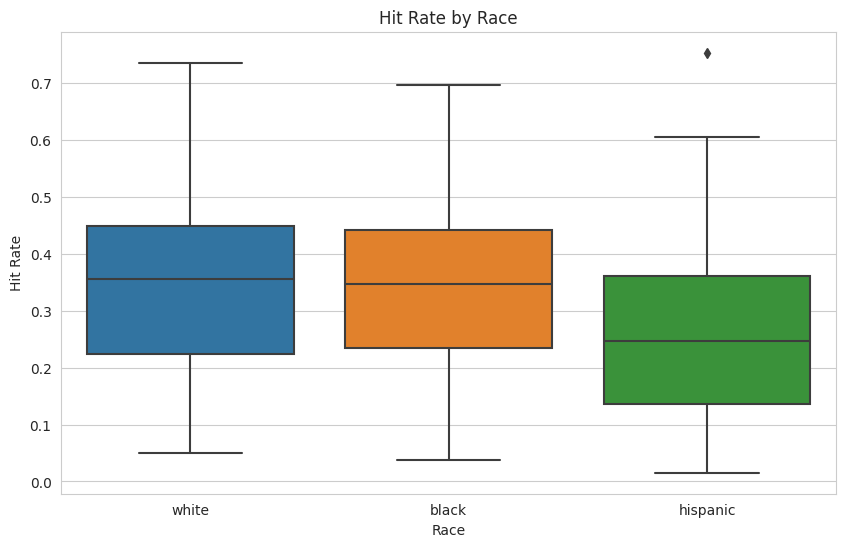

In [7]:
# Box plot of hit rate by race
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='subject_race', y='hit_rate')
plt.title('Hit Rate by Race')
plt.xlabel('Race')
plt.ylabel('Hit Rate')
plt.show()


In [8]:
# Top 10 counties with the highest number of stops
top_stops_counties = data.groupby('subgeography')['stops_per_year'].sum().nlargest(10)

# Top 10 counties with the highest stop rate
top_stoprate_counties = data.groupby('subgeography')['stop_rate'].mean().nlargest(10)

# Top 10 counties with the highest search rate
top_searchrate_counties = data.groupby('subgeography')['search_rate'].mean().nlargest(10)

# Average hit rate for these counties
avg_hitrate_top_stops = data[data['subgeography'].isin(top_stops_counties.index)]['hit_rate'].mean()
avg_hitrate_top_stoprate = data[data['subgeography'].isin(top_stoprate_counties.index)]['hit_rate'].mean()
avg_hitrate_top_searchrate = data[data['subgeography'].isin(top_searchrate_counties.index)]['hit_rate'].mean()

(top_stops_counties, top_stoprate_counties, top_searchrate_counties, avg_hitrate_top_stops, avg_hitrate_top_stoprate, avg_hitrate_top_searchrate)


(subgeography
 Los Angeles County       685327.636364
 San Diego County         325811.636364
 Orange County            290254.241064
 San Bernardino County    237885.272727
 Alameda County           185008.545455
 Kern County              172025.636364
 Santa Barbera County     161851.272727
 Maricopa County          155004.867470
 Riverside County         143570.545455
 Sacramento County        133980.181818
 Name: stops_per_year, dtype: float64,
 subgeography
 Fort Peck County     0.214800
 Beaverhead County    0.163007
 Big Horn County      0.163007
 Blaine County        0.163007
 Broadwater County    0.163007
 Carbon County        0.163007
 Carter County        0.163007
 Cascade County       0.163007
 Chouteau County      0.163007
 Daniels County       0.163007
 Name: stop_rate, dtype: float64,
 subgeography
 Sumter County      0.079571
 12                 0.076738
 14                 0.076675
 17                 0.073578
 11                 0.073455
 Claredon County    0.071420
 

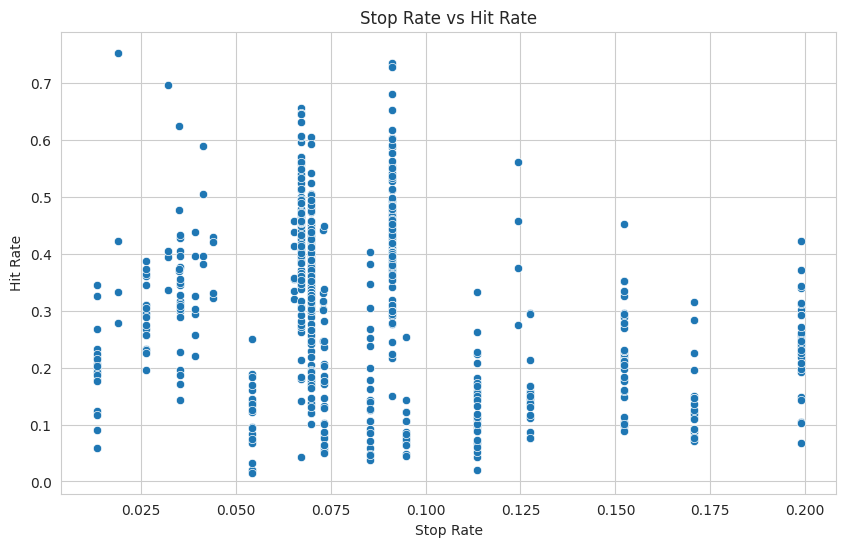

<module 'matplotlib.pyplot' from '/home/brandon/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [9]:
# Scatter plot of stop rate vs hit rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='stop_rate', y='hit_rate')
plt.title('Stop Rate vs Hit Rate')
plt.xlabel('Stop Rate')
plt.ylabel('Hit Rate')
plt.show()

# Calculate the Pearson correlation coefficient
stop_hit_corr = data[['stop_rate', 'hit_rate']].corr()

# Scatter plot of search rate vs hit rate
plt


<h1>Key Findings</h1>

***States and Counties:***

The dataset covers 21 unique states with 1062 unique subgeographies or counties.
The county with the most records is Jefferson County.
Missing Values:

The fields search_rate, hit_rate, and inferred_threshold have many missing values, which may limit the insights that can be derived from these fields.


***Stops by Race:***

The most stops were made for individuals identified as 'white', followed by 'hispanic' and 'black'.


***Stop Rate by Race:***

The median stop rate appears to be highest for 'black', followed by 'hispanic' and 'white'.

***Search Rate by Race:***

The median search rate appears to be slightly higher for 'black' and 'hispanic' compared to 'white'.

***Stops by State:***

Some states have a significantly higher total number of stops per year than others.
The state with the highest total number of stops per year appears to be California (CA), followed by Texas (TX) and Florida (FL).


***Rate Variations across States:***

The stop rate and search rate vary considerably across states.
The states with the highest average stop rate and search rate are not necessarily the ones with the highest total number of stops.

***Correlation between Rates:***

There is no strong linear relationship between the stop rate and the search rate or between the stop rate and the hit rate.
The same is true for the search rate and the hit rate.

***Stops by County:***

The counties with the highest total number of stops per year include Los Angeles County, San Diego County, Orange County, San Bernardino County, and Alameda County, among others.
The average hit rate for these counties is approximately 0.25.
Rate Variations across Counties:

The counties with the highest average stop rate and search rate do not necessarily align with the counties with the highest total number of stops.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define numerical and categorical columns
numerical_cols = ['search_rate', 'stop_rate', 'hit_rate', 'inferred_threshold', 'stops_per_year', 'stop_rate_n']
categorical_cols = ['subject_race', 'state', 'subgeography']

# Preprocessing for numerical columns (fill missing values with median)
num_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical columns (fill missing values with most frequent value and then one-hot encode)
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),
        ('cat', cat_transformer, categorical_cols)
    ])

# Define your target variable and features
# Define your target variable and features
y = data['subject_race']  # replace 'subject_race' with the name of your target column
X = data.drop('subject_race', axis=1)  # replace 'subject_race' with the name of your target column

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






In [11]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Define numerical and categorical columns
numerical_cols = ['search_rate', 'hit_rate', 'inferred_threshold', 'stops_per_year']
categorical_cols = ['subject_race', 'state', 'subgeography']

# Preprocessing for numerical columns (fill missing values with median)
num_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical columns (fill missing values with most frequent value and then one-hot encode)
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),
        ('cat', cat_transformer, categorical_cols)
    ])

# Define your target variable and features
y = data['stop_rate']  # replace 'stop_rate' with the name of your target column
X = data.drop('stop_rate', axis=1)  # replace 'stop_rate' with the name of your target column

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_test)

# Evaluate the model
score = my_pipeline.score(X_test, y_test)
print(f'Random Forest Regressor R^2 score: {score}')


Random Forest Regressor R^2 score: 0.9996139202565302


In [14]:
import os
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set the MLflow tracking server to a backend
mlflow.set_tracking_uri('http://127.0.0.1:5000')  # replace 'http://my-server:5000' with your backend server

# Start a new MLflow run
with mlflow.start_run():
    # Preprocessing of training data, fit model 
    my_pipeline.fit(X_train, y_train)

    # Preprocessing of validation data, get predictions
    preds = my_pipeline.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    # Log model
    mlflow.sklearn.log_model(my_pipeline, "model")

    # Log metrics
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)

    # Log parameter
    mlflow.log_param("model_type", "Random Forest Regressor")

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")



MlflowException: API request to http://localhost:5000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7febdb5e9760>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [ ]:
from prefect import Flow, task, context, logging, flow
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

@task
def load_data():
    # Load your data here
    # X_train, X_test, y_train, y_test should be defined here
    return {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}

@task
def train_model(data):
    my_pipeline.fit(data['X_train'], data['y_train'])
    return my_pipeline

@task
def make_predictions(model, data):
    preds = model.predict(data['X_test'])
    return preds

@task
def calculate_metrics(data, preds):
    rmse = np.sqrt(mean_squared_error(data['y_test'], preds))
    mae = mean_absolute_error(data['y_test'], preds)
    r2 = r2_score(data['y_test'], preds)
    return {'rmse': rmse, 'mae': mae, 'r2': r2}

@task
def log_metrics(metrics):
    logger = logging.get_run_logger()
    logger.info(f"RMSE: {metrics['rmse']}")
    logger.info(f"MAE: {metrics['mae']}")
    logger.info(f"R2: {metrics['r2']}")
    
@flow(name="End-to-end Flow")
def run_flow_fn():
    data = load_data()
    model = train_model(data)
    preds = make_predictions(model, data)
    metrics = calculate_metrics(data, preds)
    log = log_metrics(metrics)
        
# Call the function to run the flow
run_flow_fn()




In [ ]:
#Important IPs
#Prometheus: localhost:9090 #Don't forget to cd into the Prometheus folder
#MLFlow: localhost:5001
#Grafana: localhost:3000

#start the Grafana server
#sudo service grafana-server start

#start the Prometheus server
#./prometheus --config.file=prometheus.yaml

#Starts the Prefect Server
#prefect server start


#Gradio IP
#http://127.0.0.1:7861/

In [ ]:
#Create the Gradio App
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Define numerical and categorical columns
numerical_cols = ['search_rate', 'hit_rate', 'inferred_threshold', 'stops_per_year']
categorical_cols = ['subject_race', 'state', 'subgeography']

# Preprocessing for numerical columns (fill missing values with median)
num_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical columns (fill missing values with most frequent value and then one-hot encode)
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),
        ('cat', cat_transformer, categorical_cols)
    ])

# Define your target variable and features
y = data['stop_rate']  # replace 'stop_rate' with the name of your target column
X = data.drop('stop_rate', axis=1)  # replace 'stop_rate' with the name of your target column

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

def predict(search_rate, hit_rate, inferred_threshold, stops_per_year, subject_race, state, subgeography):
    df = pd.DataFrame({
        'search_rate': [search_rate], 
        'hit_rate': [hit_rate],
        'inferred_threshold': [inferred_threshold],
        'stops_per_year': [stops_per_year],
        'subject_race': [subject_race],
        'state': [state],
        'subgeography': [subgeography]
    })
    preds = my_pipeline.predict(df)
    return preds[0]

# Define the Gradio interface
iface = gr.Interface(
    fn=predict, 
    inputs=[
        gr.inputs.Number(label=numerical_cols[0]),
        gr.inputs.Number(label=numerical_cols[1]),
        gr.inputs.Number(label=numerical_cols[2]),
        gr.inputs.Number(label=numerical_cols[3]),
        gr.inputs.Dropdown(choices=data[subject_race].unique().tolist(), label=categorical_cols[0]),
        gr.inputs.Dropdown(choices=data[state].unique().tolist(), label=categorical_cols[1]),
        gr.inputs.Dropdown(choices=data[subgeography].unique().tolist(), label=categorical_cols[2])
    ], 
    outputs='number',
)

# Launch the Gradio interface
iface.launch(share=)

